In [1]:
import os
from pathlib import Path
import sys

if "__project_dir__" not in globals():
    __project_dir__ = Path.cwd().parent.resolve()

sys.path.append(__project_dir__)
os.chdir(__project_dir__)

In [33]:
import json
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from numpy import ndarray
import pandas as pd
from pandas import DataFrame
import pickle

import seaborn as sns
from src.model_analyser.tcr_edit_distance_records.tcr_edit import Position

sns.set_theme()
plt.tight_layout()

matplotlib.rcParams["text.usetex"] = True
matplotlib.rcParams["font.family"] = "serif"

<Figure size 640x480 with 0 Axes>

In [34]:
MODELS = {
    "SCEPTR": "SCEPTR",
    "SCEPTR_trainable_embeddings": "SCEPTR (trainable embeddings)"
}

In [35]:
def read_calibration_results(model_name: str) -> dict:
    benchmarks_path = Path("/home/yutanagano/Projects/tcr_embedder/benchmarks")
    with open(benchmarks_path/model_name/"distance_correlate_analysis"/"results.json", "r") as f:
        return json.load(f)["edit_distance_summary"]

In [36]:
results_dict_collection = {
    model_name: read_calibration_results(savename) for savename, model_name in MODELS.items()
}

In [37]:
results_dict_collection

{'SCEPTR': {'insertions': {'mean_distances': [0.6892986327409745,
    0.6584883660078048,
    0.6146293520927429,
    0.6448601901531219,
    0.6897947669029235],
   'standard_deviations': [0.1201203915703661,
    0.11766450578637608,
    0.10940885105135624,
    0.12363481685707091,
    0.14203275208680857]},
  'deletions': {'mean_distances': [0.6275287629136141,
    0.6751369654651963,
    0.6454926744380206,
    0.6415991677556718,
    0.6789410909550303],
   'standard_deviations': [0.10013009725904884,
    0.09826474025797328,
    0.09350640859990221,
    0.09757284517830332,
    0.10768995856888257]},
  'substitutions': {'mean_distances': [0.3008900551362483,
    0.4095057798254712,
    0.39426081540228486,
    0.327167104488511,
    0.31184464794889427],
   'standard_deviations': [0.06019061443925321,
    0.06700033510976303,
    0.06553209542582716,
    0.0794280342335527,
    0.06948368049905183]}},
 'SCEPTR (trainable embeddings)': {'insertions': {'mean_distances': [0.92912605

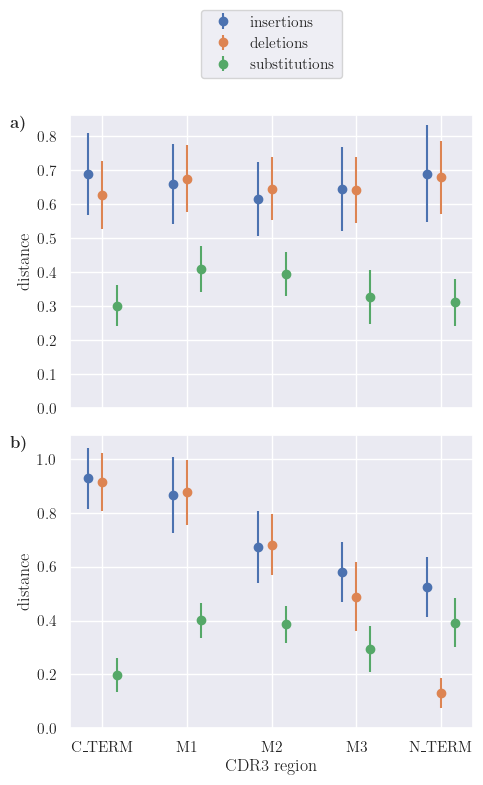

In [51]:
x_positions = np.arange(len(Position)) * 6

fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5,8))

for ax, results_dict in zip(axs, results_dict_collection.values()):

    ax.errorbar(x_positions, results_dict["insertions"]["mean_distances"], yerr=results_dict["insertions"]["standard_deviations"], fmt="o", label="insertions")
    ax.errorbar(x_positions+1, results_dict["deletions"]["mean_distances"], yerr=results_dict["deletions"]["standard_deviations"], fmt="o", label="deletions")
    ax.errorbar(x_positions+2, results_dict["substitutions"]["mean_distances"], yerr=results_dict["substitutions"]["standard_deviations"], fmt="o", label="substitutions")
    ax.set_xticks(x_positions+1, [position.name for position in Position])

    ax.set_ylabel("distance")
    ax.set_ylim(0)


for ax, label in zip(axs, ("a)", "b)")):
    trans = matplotlib.transforms.ScaledTranslation(-60/100, 0, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, r"\textbf{" + label + "}", transform=ax.transAxes + trans,
            fontsize='medium', va='top', fontfamily='serif')


axs[1].set_xlabel("CDR3 region")
axs[0].legend(loc="lower center", bbox_to_anchor=(0,1.1,1,1))

plt.tight_layout()

fig.savefig("model_calibration.pdf", dpi=300, bbox_inches="tight")